# Plotting and Visualization

Labeled data enables expressive computations. These same labels can also be used to easily create informative plots.

xarray plotting functionality is a thin wrapper around the popular matplotlib library. Matplotlib syntax and function names were copied as much as possible, which makes for an easy transition between the two.

### Outline
- Matplotlib Integration
- Maps using Cartopy
- Extensions using Bokeh/Holoviews/Geoviews

### Tutorial Duriation
10 minutes

### Going Further

Xarray's Documentation on Plotting: http://xarray.pydata.org/en/latest/plotting.htm


In [1]:
%matplotlib inline

import xarray as xr
import matplotlib.pyplot as plt


# load some tutorial data
ds = xr.tutorial.load_dataset('air_temperature')

## Plotting 1d data

<class 'xarray.core.resample.DataArrayResample'>


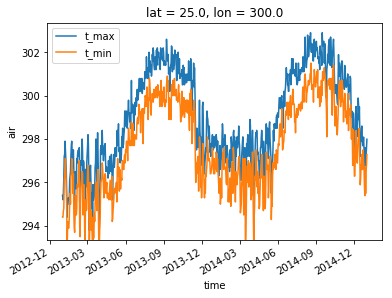

In [4]:
da_point_resample = ds['air'].isel(lat=20, lon=40).resample(time='1D')
print(type(da_point_resample))

t_max = da_point_resample.max('time')
t_min = da_point_resample.min('time')
t_max.plot(label='t_max')
t_min.plot(label='t_min')
plt.legend()

## Plotting 2d Data

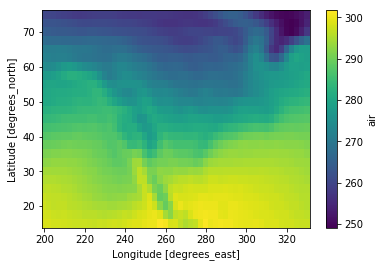

In [5]:
t_mean = ds['air'].mean('time')

t_mean.plot()

## Plotting >2d Data

(array([   2182.,   60537.,  195026.,  233763.,  315219.,  635948.,
         778807., 1192236.,  453381.,    1901.]),
 array([221.     , 230.64   , 240.28   , 249.92   , 259.56   , 269.2    ,
        278.84   , 288.47998, 298.12   , 307.76   , 317.4    ],
       dtype=float32),
 <a list of 10 Patch objects>)

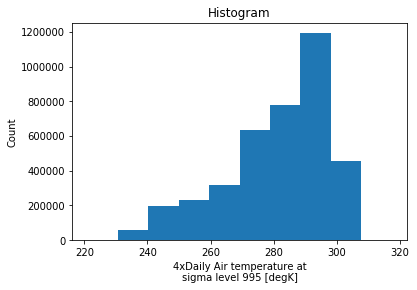

In [6]:
ds['air'].plot()

## FacetGrid Plots

In [7]:
# Calculate some seasonal anomalies

da_month = ds['air'].resample(time='QS-Dec').mean('time')

climatology = da_month.groupby('time.season').mean('time')
anomalies = da_month.groupby('time.season') - climatology
anomalies

<xarray.DataArray 'air' (time: 9, lat: 25, lon: 53)>
array([[[-3.773804, -3.678513, ...,  0.694107,  0.511429],
        [-3.474045, -3.666229, ...,  0.360214, -0.020752],
        ...,
        [-0.704315, -0.852051, ..., -0.583862, -0.642242],
        [-0.715424, -0.850372, ..., -0.569336, -0.589539]],

       [[-1.346527, -1.386505, ...,  0.275513,  0.253067],
        [-1.623169, -1.677673, ...,  0.34256 ,  0.185089],
        ...,
        [-0.185394, -0.185577, ...,  0.637665,  0.635193],
        [-0.167633, -0.191406, ...,  0.611938,  0.589539]],

       ...,

       [[ 0.904022,  0.800323, ...,  0.871872,  0.839523],
        [ 0.238525,  0.049438, ...,  1.4216  ,  1.492126],
        ...,
        [ 0.464142,  0.478058, ...,  0.009064, -0.012024],
        [ 0.452423,  0.437134, ..., -0.037537, -0.024811]],

       [[ 0.332367,  0.4272  , ..., -1.304581, -1.535797],
        [-0.378113, -0.037628, ..., -1.495529, -1.767532],
        ...,
        [ 0.473602,  0.563446, ...,  1.30896 ,  1.

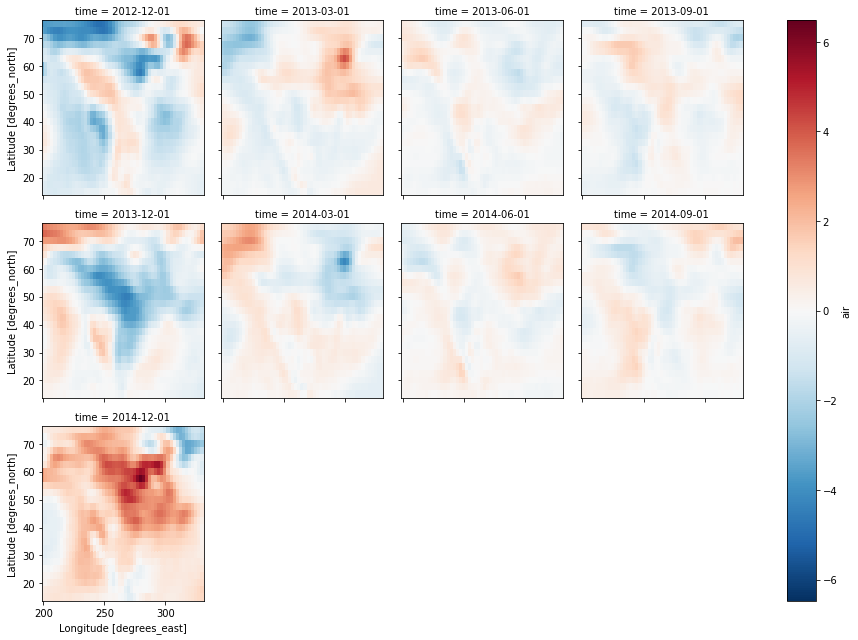

In [8]:
anomalies.plot(col='time', col_wrap=4)

## Plotting maps using Cartopy

In [9]:
import cartopy.crs as ccrs

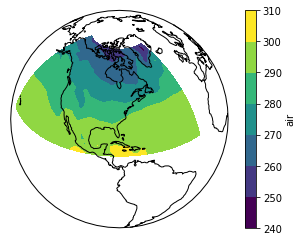

In [10]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
t_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

## Plotting using Holoviews and Geoviews

In [11]:
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

hv.notebook_extension()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [12]:
# initialize the holoviews dataset
ds_hv = hv.Dataset(t_mean)
ds_hv

:Dataset   [lat,lon]   (air)

:Image   [lon,lat]   (air)
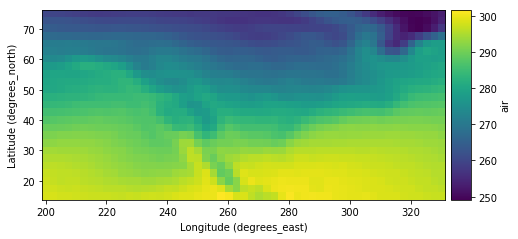

In [13]:
# make a plot with holoviews
%opts Image [colorbar=True fig_size=200] (cmap='viridis')
ds_hv.to(hv.Image, ['lon', 'lat'])

:Overlay
   .Image.I     :Image   [lon,lat]   (air)
   .Coastline.I :Feature   [Longitude,Latitude]
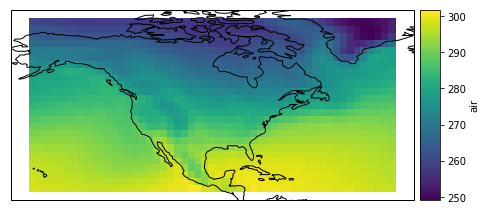

In [14]:
# repeat the same steps but now use geoviews
%opts Image [colorbar=True fig_size=200] (cmap='viridis')
ds_hv.to(gv.Image, ['lon', 'lat'], ['air'], ['time']) * gf.coastline()

In [15]:
# This may require the legacy notebook interface?
%opts Image [colorbar=True fig_size=200] (cmap='RdBu_r')
ds_hv2 = hv.Dataset(anomalies)
ds_hv2.to(gv.Image, ['lon', 'lat'], ['air'], ['time']) * gf.coastline()

:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [lon,lat]   (air)
      .Coastline.I :Feature   [Longitude,Latitude]